### Import Section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Real-life example.csv')

In [3]:
dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


as you can see in registration 3947 total entries and all are yes so it is no useful.
second model columnhas 312 unique value of model so it is not useful for us.

In [5]:
dataset = dataset.drop(['Model','Registration'] , axis =1)

In [6]:
dataset.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011


### check for missing values

In [7]:
dataset.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

so here price adn mileage has missing values

### if you are removing <5% observation then you can remove all missing values observations

In [8]:
dataset = dataset.dropna(axis=0)

In [9]:
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1534,NaN,NaN,1861,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000


### plotting

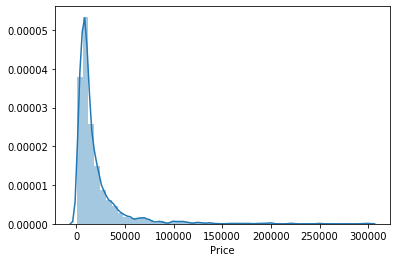

In [10]:
sns.distplot(dataset['Price'])

in this plot we can see there are many outliers.s o we have to remove them

In [11]:
q = dataset['Price'].quantile(0.99)
dataset = dataset[dataset['Price'] < q] # we are removing 1 % outliers

In [12]:
q = dataset['Year'].quantile(0.01)
dataset = dataset[dataset['Year'] > q] # we are removing 1 % outliers

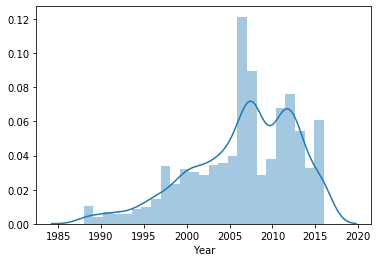

In [13]:
sns.distplot(dataset['Year'])

In [14]:
dataset = dataset[dataset['EngineV'] < 6.5]
dataset.describe()

,Price,Mileage,EngineV,Year
count,3905.000000,3905.000000,3905.000000,3905.000000
mean,18100.297083,164.107298,2.449795,2006.620487
std,19056.178291,102.377608,0.947793,6.173623
min,800.000000,0.000000,0.600000,1988.000000
25%,7150.000000,92.000000,1.800000,2003.000000
50%,11500.000000,159.000000,2.200000,2008.000000
75%,21500.000000,230.000000,3.000000,2012.000000
max,129222.000000,980.000000,6.300000,2016.000000


In [15]:
dataset = dataset.reset_index(drop=True)

In [16]:
dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
3900,Volkswagen,11500.0,van,163,2.5,Diesel,2008
3901,Toyota,17900.0,sedan,35,1.6,Petrol,2014
3902,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
3903,BMW,6500.0,sedan,1,3.5,Petrol,1999


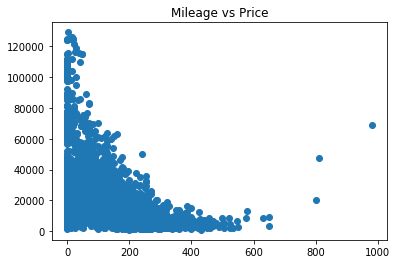

In [17]:

plt.scatter(dataset['Mileage'] , dataset['Price'])
plt.title('Mileage vs Price')
plt.show()

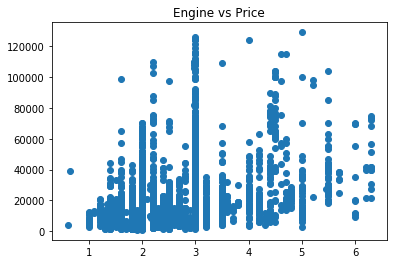

In [18]:
plt.scatter(dataset['EngineV'] , dataset['Price'])
plt.title('Engine vs Price')
plt.show()

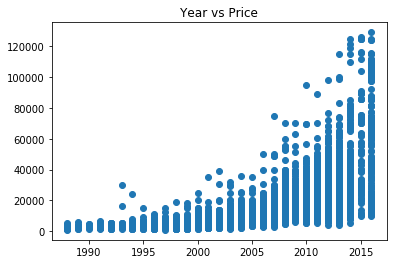

In [19]:
plt.scatter(dataset['Year'] , dataset['Price'])
plt.title('Year vs Price')
plt.show()

### as you can see there is nothing like regressing in this plot so we have to tranform this variable in logarithmic...

In [20]:
log_price = np.log(dataset['Price'])
dataset['log_price'] = log_price
dataset.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,9.814656


In [21]:
# we don't need prince column now because all features are regressing with log_prcie features...
dataset = dataset.drop(columns=['Price'])
dataset

,Brand,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,2011,9.814656
...,...,...,...,...,...,...,...
3900,Volkswagen,van,163,2.5,Diesel,2008,9.350102
3901,Toyota,sedan,35,1.6,Petrol,2014,9.792556
3902,Mercedes-Benz,sedan,9,3.0,Diesel,2014,11.736069
3903,BMW,sedan,1,3.5,Petrol,1999,8.779557


### Multi-collnearity

we can find multicollnearity using VIF varience inflaction factor

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = dataset[['Mileage' , 'EngineV' , 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif['features'] = ['Mileage' , 'EngineV' , 'Year']

In [23]:
vif

,VIF,features
0,3.546054,Mileage
1,7.680951,EngineV
2,10.140993,Year


as you can see year has very high multicollinearity so we can remove it.

In [24]:
dataset = dataset.drop(columns=['Year'])

### Dummy variables

In [25]:
dummies = pd.get_dummies(dataset , drop_first=True)

In [26]:
cols = dummies.columns

In [27]:
cols

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol'],
      dtype='object')

In [28]:
cols = [ 'log_price','Mileage', 'EngineV','Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch','Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol']

In [29]:
dataset = dummies[cols]

In [30]:
dataset.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Data Preprocesing

In [31]:
y = dataset['log_price']
x = dataset.drop(columns=['log_price'])

In [32]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x , y , test_size =0.2, random_state=0)

### Linear Regression

In [34]:
from sklearn.linear_model  import LinearRegression
model  = LinearRegression()
model.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_t_pred = model.predict(x_train)
model.score(x_train , y_train)

0.6040609228752951

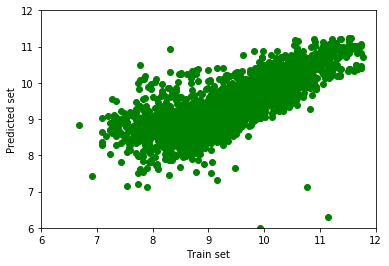

In [40]:
plt.scatter(y_train , y_t_pred , color='green')
plt.xlabel('Train set')
plt.ylabel('Predicted set')
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

In [37]:
model_summary = pd.DataFrame(dataset.drop(columns=['log_price']).columns.values , columns=['Features'])
model_summary['Coeff'] = model.coef_
model_summary

,Features,Coeff
0,Mileage,-0.493946
1,EngineV,0.225415
2,Brand_BMW,0.014790
3,Brand_Mercedes-Benz,0.049627
4,Brand_Mitsubishi,-0.100098
5,Brand_Renault,-0.121564
6,Brand_Toyota,-0.008162
7,Brand_Volkswagen,-0.030095
8,Body_hatch,-0.177427
9,Body_other,-0.109924


### Testing 

In [41]:
y_test = y_test.reset_index()


In [43]:
y_pred = model.predict(x_test)

In [44]:
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [57]:
result = pd.DataFrame(y_pred , columns=['Predicted'])
result['Original'] = y_test

In [59]:
result.head(20)

,Predicted,Original
0,23357.355781,20800.0
1,11606.960012,9850.0
2,4505.139799,7900.0
3,6254.773713,1650.0
4,3813.171758,6200.0
5,21881.109175,42900.0
6,6807.388782,8500.0
7,13342.112060,7500.0
8,6823.190900,8200.0
9,17943.894310,16999.0
